#### Excessively Load Packages That I Likely Won't Use

In [1]:
!pip install pandas
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install tensorflow-gpu
import tensorflow as tf

!pip install keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt #2d plotting
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
from scipy.stats import uniform  # for training-and-test split
%config IPCompleter.greedy=True #tabbing for autocomplete
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
import matplotlib.pyplot as plt

!pip install cufflinks
import cufflinks as cf
import plotly 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from sklearn.metrics import confusion_matrix
!pip install idx2numpy
import idx2numpy



Using TensorFlow backend.


In [2]:
import tensorflow as tf

with tf.device("/gpu:0"):
    with tf.Session() as sess:
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
        c = tf.matmul(a ** 2, b ** 2)
    # Runs the op.
    print(sess.run(c))


[[ 262.  392.]
 [1141. 1760.]]


# Laboratory Exercise 3

### The research question is can we use algorithms and compute to identify handwritten digits? Specifically, can we determine which algorithm and compute methodology provides us the most efficient approach for classifying handwritten digits?

Using the base samples available from Prof LeCun:


o http://yann.lecun.com/exdb/mnist/


o Review the data – clean as appropriate


o Provide an initial data analysis

The first step is to load the data into to arrays. The Mnist data is available through the Keras and Tensorflow libraries, 
so to avoid local storage and data conversion, we utilize the given functionality. use the mnist.load data function to read the dataset into 4 different arrays: training image data, training labels, testing image, testing labels. We revert course and decide to use an external library, idx2numpy, that reads in idx files and converts them into numpy arrays. The results are the same, but we've utilized a different method.

In [3]:
#Pip install git+https://github.com/ivanyu/idx2numpy.git to read library in from Github via Conda Prompt
#https://pypi.python.org/pypi/idx2numpy
#https://keras.io/datasets/
#https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

#from keras.datasets import mnist #mnist dataset preloaded into Keras
#(x_train, y_train), (x_test, y_test) = mnist.load_data() #store into 4 arrays: training image data, training labels, testing image, testing labels

#or reading the files in from http://yann.lecun.com/exdb/mnist/
!pip install idx2numpy
import idx2numpy
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

Printing the shapes of the data tells us that we are dealing with 60000 observations for our training set, and 10000 for our validation/test set. A snippet of code below shows what the the plotted values of the pre-transformed data represent, visually. Additionally, we look at a countplot of the training labels to understand the distribution of digits, which appears to show some effects of stratified sampling rather than random sampling. This was likely done to be able to better judge the model, for example, if we were looking at a randomly sampled set where n = 60000 and the digit 9 was present 50000 times in the sample, or model could learn to randomly guess 9 for each set of inputs and have an accuracy of 90%. The ytest data also shows relatively even probability distributions across all 10 possible outputs. The data currently sits in multidimensional arrays, so we will want to convert the 28x28 images to be a single ndimensional vector. After conversion, we will want to look at normalizing the values. For image processing, normalization helps to bring the dynamic values of each pixel into a similar range, which becomes important during induction/deduction because we won't have drastic differences in weights from inputs.

In [16]:
def printshape (x_train, y_train, x_test, y_test):
    return("The shape of", 'x_train', x_train.shape),("The shape of", 'y_train', y_train.shape),("The shape of", 'x_test', x_test.shape),("The shape of", 'y_test', y_test.shape)

printshape(x_train, y_train, x_test, y_test)



(('The shape of', 'x_train', (60000, 28, 28)),
 ('The shape of', 'y_train', (60000,)),
 ('The shape of', 'x_test', (10000, 28, 28)),
 ('The shape of', 'y_test', (10000,)))

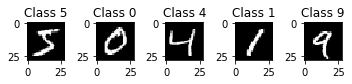

In [17]:
#Print out samples of images from training image set
for i in range(5):
    plt.subplot(5,5,i+1) 
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))    

In [19]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

def printshape (x_train, y_train, x_test, y_test):
    return("The shape of", 'x_train', x_train.shape),("The shape of", 'y_train', y_train.shape),("The shape of", 'x_test', x_test.shape),("The shape of", 'y_test', y_test.shape)

printshape(x_train, y_train, x_test, y_test)

(('The shape of', 'x_train', (60000, 784)),
 ('The shape of', 'y_train', (60000,)),
 ('The shape of', 'x_test', (10000, 784)),
 ('The shape of', 'y_test', (10000,)))

In [20]:

#Check to make sure that image data is normalized (Call max values)
print("Max pixel value of xtrain is now", np.max(x_train))
print("Max pixel value of xtest is now",  np.max(x_test))

x_train = x_train/ np.max(x_train)
x_test = x_test/np.max(x_test)

Max pixel value of xtrain is now 255
Max pixel value of xtest is now 255


In [21]:

#Check to make sure that image data is normalized (Call max values)
print("Max pixel value of xtrain is now", np.max(x_train))
print("Max pixel value of xtest is now",  np.max(x_test))

if np.max(x_train) == 1 and np.max(x_test) ==1: 
    print("The data in the image arrays are now normalized.")
else:
    print("The data is not normalized")

#Convert Dependent variable/Labels to Categorical variables per the number of class (digits- 0:9 = 10 total classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)




Max pixel value of xtrain is now 1.0
Max pixel value of xtest is now 1.0
The data in the image arrays are now normalized.


In [22]:
def printshape (x_train, y_train, x_test, y_test):
    return("The shape of", 'x_train', x_train.shape),("The shape of", 'y_train', y_train.shape),("The shape of", 'x_test', x_test.shape),("The shape of", 'y_test', y_test.shape)

printshape(x_train, y_train, x_test, y_test)

(('The shape of', 'x_train', (60000, 784)),
 ('The shape of', 'y_train', (60000, 10)),
 ('The shape of', 'x_test', (10000, 784)),
 ('The shape of', 'y_test', (10000, 10)))

Now that we have our data formatted, inspected and split into appropriate bindings, we need to decide which models we would like to apply. I had just recently run through this same assignment using Keras to build a convolutional neural network, and was met with an accuracy greater than 97%. I had previously utilized other algorithms (IST 565) such as support vector machines and random forests, but I want to focus specifically on neural networks, and more precisely the differences between CNNs and NNs, or multilayer perceptrons. Some of the things that I want to further understand and will research thoroughly over the course of this assignment are: Costs other than RMSE, Loss functions (Stochastic Gradient Descent vs things like cat. cross entropy), MaxPooling, determing size of a network (hidden layers), and tying in with loss functions, I'd like to have a better technical/mathematical understanding of how backpropogation works. CNNs were constructed with image detection and computer vision in mind, so I have little doubt that our performance will reflect that, but I would like to futher understand the inner workings of deep learning algorithms. As it stands, I understand that inputs are multiplied by weights, that number is passed through to the hidden layer (Or multiple HLs) where it is multiplied by an activation function (Relu/Sigmoid/Tan) and passed through to the output layer. If we are dealing with a multinomial classification problem, we likely need to employ the use of a softmax function at the output to garner probability distribution of our classes. I will utilize online tutorials and books such as 'Deep learning' and 'Deep Learning with Keras'.

## Starting with Multilayer Perceptrons (Feed Forward Neural Net)

In [23]:
model = Sequential() #Prime the model
model.add(Dense(512, input_shape=(784,)))#shape from reshaped vector
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

The code above produces a 4 layer perceptron. The dense function is a way of setting up a fully connected neural net, meaning each neuron in one layer are connected to the neurons in the next layer. The 'Dense' value was arbitrarily assigned, but refers to the number of neurons within each layer. An activation function, in the simplest terms, is a nonlinear function that can be applied to the output of a hidden layer as sort of a normalization technique to ensure that all outputs fall within a certain range- otherwise known as a squashing function. Sigmoid transforms values between 0 and 1, Tanh maps values between -1 and 1 and Relus maps all negative values to a new value of 0. A softmax function is typically used within a multinomial classification problem and provides probability distributions per classes (equal to 1)- This is always applied at the output layer. Dropout is a way to prevent overfitting and works by turning off specific neurons to force the network to learn different ways to solve the same problem, ie. we want the the network to be adaptable, and not simply memorize the steps. Dropout kind of works as a regularization technique, similarly to when you might do a Ridge/Lasso regression (I covered this in Lab2) where there is punishment for large weights that control the outcome. 

"Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights" (http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)

### Training the Model

In [ ]:
with tf.device('/gpu:0'):

    
    from keras.optimizers import SGD
    np.random.seed(1234) #set random seed for reproducibility

    NB_EPOCH = 50
    #NB_EPOCH = 50
    BATCH_SIZE = 100
    #BATCH_SIZE = 50
    VERBOSE = 1 #This sets Verbose to true meaning that logging output will be displayed on screen. Verbose = 0 is default and does allow model to run faster.
    NB_CLASSES = 10
    OPTIMIZER = SGD()
    VALIDATION_SPLIT = .2

    model.compile(loss = 'categorical_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])
    
    sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
    
    history = model.fit(x_train, y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split= VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50


In the cell above, we train the model and validate against a cutpoint of our training data (.2). Important terms for which we fit our model are Epochs and Batch size. Epochs are the number of iterations that are flowed through on the training set, and batch size is the number of observations that are gone through before the backpropogation algorithm kicks in and the weights are adjusted. We use categorical cross entropy as our loss function, as binary cross entropy would be more useful if we were dealing with a binary class problem, and mean square error might be more useful if we were dealing with a continuous response variable. The optimizer is set to stochastic gradient descent, but there are also versions of GD known as ADAM or RMSprop. The optimizer works as a loss function that is enabled during back propogation. Gradient descent works by adjusting the weights assigned to neurons by taking partial derivatives and computing the local minimum. A great analogy was found on quora: "Suppose you are on the top of a mountain. You want to climb down from the mountain. What will you do? You will take a fewer steps downwards until you reach to the base of the mountain.Here there are two cases:
i) Take small steps(very tiny) : Well you will die of hunger before you reach to the base.
ii) Take huge steps(gigantic..really) : Well you jump off the cliff and the next thing a chopper will find your shattered pieces of body :P
You don’t want to die obviously.. so you take steps enough to reach the base in time"

https://www.quora.com/What-is-an-intuitive-explanation-of-gradient-descent

Numbers above are randomly chosen, but  the model construction follows along with 'Deep Learning with Keras'.

### Testing the MLP

10000/10000 [==============================] - 1s 83us/step
Accuracy on test set = 0.9551


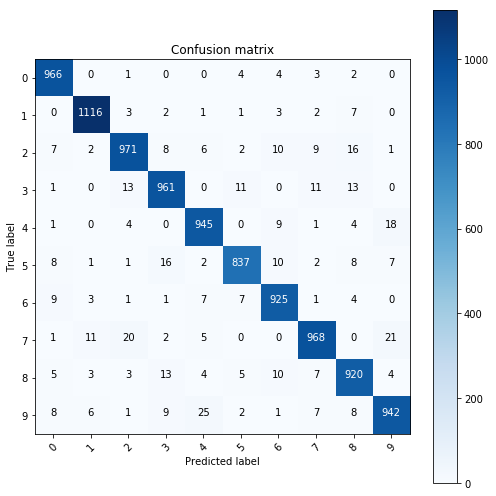

In [26]:
score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))




As we can see above, using the model on our test set results in about 98% accuracy. Our testing loss was a little higher than on our training set, but not noticable enough to raise concerns over overfitting. Using a UDF confusion matrix (yashk2810.github.io/), we can look at what specific digits our model had trouble recognizing, noting that distinguishability was difficult when looking at 9's vs 4's in particular. We could attempt to raise the 'dropout', or increase the amount of hidden layers or iterations, but are happy to use 98% as our benchmark. Previously Kaggle submissions using ensemble methods (RandForests) resulted in accuracy of <85%. The compute was relatively quick, running at about 5sec per epoch/iteration.

## On to Convolutional Neural Networks

I had previously conducted this experiment with CNNs, but want to better understand the differences between MLP and ConvNets. From "Deep Learning With Keras", one of the main differences between the two DL algorithms is the fact that we had to transform the shape of the images in MLPs to remove spatial structure from each image. This very spatial structure is what CNNS thrive on for classification models. The cell below follows much of the data munging and transformation that we did above, but we note that we don't reshape the image into a flat vector, but instead into three dimensions. 

In [4]:
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

#normalize by dividing by max value 
x_train = x_train/255
x_test = x_test/255

#Convert to support GPU computation (Deep Learning with Keras)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#Convert Dependent variable/Labels to Categorical variables per the number of class (digits- 0:9 = 10 total classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Training the Convnet

The below chunk is representative of a known CNN architecture that performed well on the MNIST project, with a few user tweaks. Some things that differ from the MLP above and we need to research are: Conv layers, Maxpooling, flattening, and data augmentation. The explanations that follow will be my interpretation of research conducted through web searches and reading "Deep Learning with Keras". A Convnet is made up of 4 steps: convolution, activation, pooling, and a fully connected dense layer (similar to MLPs). Starting from the beginning, the first layer, we look at the Conv2D function, whick takes the number of filters, the size of the filters, and the original input shape of our training set (we reshaped this to 28x28x1 above). Lines containing batch normalization are implemented in order to assure that scale of dimensionality remains the same as we move from layer to layer. In the below model construction, we can see that there are 4 conv layers, 4 batchnormalization calls, and 4 layers of activation functions = Relu. The model below has more hidden layers than a simple CNN due to repeating steps. The activation functions work in the same way as MLP, simply squashing the outputs of the layers (negative values set to 0, all other values remain constant). Onto the pooling layers- There are many different types of pooling to implement on pooling layers. Maxpooling is directly defined as "outputting the max activation as observed in the region". The way I interpret this is that if we have a matrix that is 4x4 and we want to transform it into a 2x2 matrix (this is called downsampling) we want to take the max value of each region of the matrix as the output of our new matrix. Downsampling, through the above technique, helps to reduce dimensionality which reduces training time, and also helps to generalize the model because we aren't just memorizing inputs. Average pooling, which I don't use below, would calculate the average of each region into a subregion. After we have our conv layers, activation layers and max pooling layers defined, we need to flatten the outputs to transform them into inputs for our fully connected layer. This follows the same structure as our MLP above, having an initial dense layer feeding into a hidden layer with activation, into an output layer with a softmax activation function used for multionomial classification problems. Dropout, again, is our way of shutting of neurons randomly throughout training to make the model adaptable. 



"Deep Learning with Keras"

In [ ]:
# Set the CNN model 
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))

model.add(Activation('softmax'))

np.random.seed(1234) #set random seed for reproducibility


NB_EPOCH = 10
#NB_EPOCH = 50
BATCH_SIZE = 50
#BATCH_SIZE = 50
VERBOSE = 1 #This sets Verbose to true meaning that logging output will be displayed on screen. Verbose = 0 is default and does allow model to run faster.
NB_CLASSES = 10
OPTIMIZER = SGD() #Could also use Adam or RMSprop here.
#OPTIMIZER = ADAM()
VALIDATION_SPLIT = .2


with tf.device('/gpu:0'):
    model.compile(loss = 'categorical_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])

    sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
    history = model.fit(x_train, y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split= VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


### Testing the Convnet

10000/10000 [==============================] - 10s 976us/step
Accuracy on test set = 0.9915


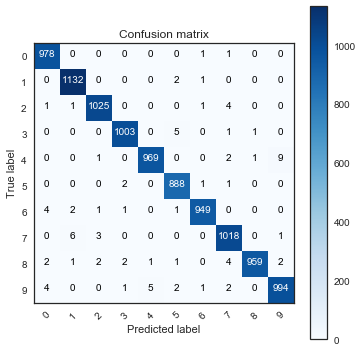

In [19]:
np.random.seed(1234) #set random seed for reproducibility

score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))




In [20]:
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_pred_classes))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      1.00      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       1.00      0.98      0.99       974
          9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



### Testing on Kaggle set + exporting for Submission

In [18]:
np.random.seed(1234) #set random seed for reproducibility


kaggle = np.array(pd.read_csv('Kaggle Submissions/test.csv'))
#normalize by dividing by max value 
kaggle = kaggle/255
#Convert to support GPU computation (Deep Learning with Keras)
kaggle = kaggle.astype('float32')
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
kaggle = kaggle.reshape(-1,28,28,1)
# predict results
results = model.predict(kaggle)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist5.csv",index=False)

### Wrapup

This exercise was a great way to learning more about deep learning techniques popularized for image recognition problems. Admittably, MLPs were much easier to digest than Convnets for me, but I'm looking forward to digging more into the architecture of CNNs, and understanding exactly what is happening at each layer. 

The accuracy of each method was comparable. Our MLP peformed slightly worse than our convet, with an accuracy about .006 lower on our test set of 10000 samples. Basically meaning that we misclassified 60 more observations with the perceptron as opposed to the convnet. 99% accuracy was achieved with the convnet, but we could have added more hidden layers/epochs to try and improve performance. Another technique that I didn't use here, but was used in some tutorials, was data augmentation- This step essentially transforms the training images to enhance the sample size and offer different perspectives of each image. Obviously with more samples you can get a generalized model much easier. Printing out the classification report from sklearn lets us see the precision/recall/fmeasure stats for each class label, and in the case of the CNN, there weren't any glaring issues- Although the number 9 had a lower fmeasure than the rest of the digits. I think that digit struggles at times because the roots for 7s and 4s are very similar to 9s, and people tend to not close off certain digits, which is recognizable to a human when dealing with contextual evidence, but not so much to a neural net without a notion of sequence or time (Think RNNs solve this, but not sure if there is a recurrent convnet out there). I think I will follow up by watching some of Andrew Ng's/Andrej Warparthy lectures to get a better grasp on the flow of convnets because it was much harder for me to understand them. Andrej Warpathy is kind of known as the benchmark human for image classification problems, scoring 96% on cat/dog classification, and I think that is important to note when dealing with computer vision tasks- We shouldn't necessarily be judging accuracy on a 0-100 scale, but should be baselining it against a humans ability to perform the same task. Going through 10k images on my own, I'm sure I would struggle with identifying some observations the same way as the NNs did on this assignment.

*Note on the above that I went back and retrained my model with more layers and boosted test accuracy to 99.5%. 

Per my email to the professor - For fun, I ran my convnet on the kaggle test set to see where I would score. I was met with an accuracy of 99.8%, good enough for the top 4% of all submissions on the digit recognizer competition.

The number one thing that I noticed in regards to the differences present between the two types of algorithms, besides their architecture, was the training time was exceptionally higher for a convnet in comparison to an MLP. We ran through about 200 epochs when training the perceptron at a time of 3sec/per, but the convnet took about 2-3 minutes per iteration. For the sake of this assignment, I set the the numberofepochs = 10 on the CNN. Both models ran through the deduction/prediction phase in under 10 seconds. I also wanted to get a grasp on a single optimizer, stochastic gradient descent, so I didn't get into research on Adam or RMSprop, but have read that Adam is a superior iterations of SGD. 